In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import warnings
import json
import pymongo
import re
from itertools import islice
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
pd.set_option('display.max_rows', 100,'display.max_columns', 1000,"display.max_colwidth",1000,'display.width',1000)

In [182]:
data = pd.read_excel("链家沈阳二手房数据.xlsx", na_values=np.nan)

In [183]:
data.shape

(2984, 31)

In [184]:
data.head()

,总价,单位价格,楼房信息,小区,所属区县,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,户型分间,小区简介,别墅类型,用水类型,用电类型,燃气价格
0,179.0,14512元/平米,2014年建/板楼,富海澜湾半岛,和平,3室2厅1厨2卫,高楼层 (共34层),123.35㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯两户,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,已上传房本照片,"{'客厅面积': '38.13平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '11.34平米', '卧室A朝向': '无', '卧室A窗型': '未知窗户类型', '卧室B面积': '15.78平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '10.89平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '5.3平米', '厨房朝向': '无', '厨房窗型': '未知窗户类型', '卫生间A面积': '4.1平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '3.43平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2013年', '楼栋总数': '27栋', '小区均价': 17465}",NaN,NaN,NaN,NaN
1,105.0,9740元/平米,2011年建/板楼,东星花庭,大东,3室2厅1厨1卫,中楼层 (共24层),107.81㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯四户,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '31.31平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '8.91平米', '卧室A朝向': '北', '卧室A窗型': '普通窗', '卧室B面积': '9.76平米', '卧室B朝向': '北', '卧室B窗型': '普通窗', '卧室C面积': '12.57平米', '卧室C朝向': '南', '卧室C窗型': '普通窗', '厨房面积': '7.97平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '3.91平米', '卫生间朝向': '北', '卫生间窗型': '普通窗', '洗手间面积': '1.95平米', '洗手间朝向': '无', '洗手间窗型': '无窗'}","{'小区建造年份': '1999年', '楼栋总数': '5栋', '小区均价': 9590}",NaN,NaN,NaN,NaN
2,67.8,8693元/平米,2000年建/板塔结合,北舍宅,皇姑,2室1厅1厨1卫,高楼层 (共7层),78㎡,平层,暂无数据,板塔结合,东 西,混合结构,简装,一梯两户,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,已上传房本照片,"{'客厅面积': '17.54平米', '客厅朝向': '无', '客厅窗型': '无窗', '卧室A面积': '14.85平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '13.43平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '厨房面积': '7.69平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '5.35平米', '卫生间朝向': '无', '卫生间窗型': '无窗', '阳台面积': '4.47平米', '阳台朝向': '西 北 东', '阳台窗型': '普通窗'}","{'小区建造年份': '1990年', '楼栋总数': '13栋', '小区均价': 14413}",NaN,NaN,NaN,NaN
3,179.0,13426元/平米,2010年建/板楼,首创国际城,浑南,3室2厅1厨2卫,低楼层 (共24层),133.33㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯三户,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '27.16平米', '客厅朝向': '西 南', '客厅窗型': '落地窗', '卧室A面积': '11.8平米', '卧室A朝向': '南', '卧室A窗型': '落地窗', '卧室B面积': '15.48平米', '卧室B朝向': '无', '卧室B窗型': '未知窗户类型', '卧室C面积': '9.36平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '15.38平米', '厨房朝向': '北', '厨房窗型': '落地窗', '卫生间A面积': '4.87平米', '卫生间A朝向': '北', '卫生间A窗型': '普通窗', '卫生间B面积': '5.22平米', '卫生间B朝向': '北', '卫生间B窗型': '落地窗', '阳台面积': '7.92平米', '阳台朝向': '西 北 东', '阳台窗型': '落地窗', '过道A面积': '5.45平米', '过道A朝向': '无', '过道A窗型': '无窗', '过道B面积': '4.06平米', '过道B朝向': '无', '过道B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '27栋', '小区均价': 11637}",NaN,NaN,NaN,NaN
4,90.0,7987元/平米,未知年建/板楼,雅居乐花园C地块,沈北新区,3室2厅1厨2卫,高楼层 (共32层),112.69㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,一梯两户,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,已上传房本照片,"{'客厅面积': '42.56平米', '客厅朝向': '东 南', '客厅窗型': '落地窗', '卧室A面积': '16.82平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '15.71平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '7.5平米', '卧室C朝向': '北', '卧室C窗型': '普通窗', '厨房面积': '5.3平米', '厨房朝向': '西', '厨房窗型': '普通窗', '卫生间A面积': '4.2平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '4.04平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '38栋', '小区均价': 9263}",NaN,NaN,NaN,NaN


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   总价      2984 non-null   float64
 1   单位价格    2984 non-null   object 
 2   楼房信息    2984 non-null   object 
 3   小区      2984 non-null   object 
 4   所属区县    2984 non-null   object 
 5   房屋户型    2984 non-null   object 
 6   所在楼层    2984 non-null   object 
 7   建筑面积    2984 non-null   object 
 8   户型结构    2967 non-null   object 
 9   套内面积    2984 non-null   object 
 10  建筑类型    2967 non-null   object 
 11  房屋朝向    2984 non-null   object 
 12  建筑结构    2984 non-null   object 
 13  装修情况    2984 non-null   object 
 14  梯户比例    2967 non-null   object 
 15  供暖方式    2984 non-null   object 
 16  配备电梯    2967 non-null   object 
 17  挂牌时间    2984 non-null   object 
 18  交易权属    2984 non-null   object 
 19  上次交易    2984 non-null   object 
 20  房屋用途    2984 non-null   object 
 21  房屋年限    2984 non-null   object 
 22  

In [186]:
data = data[data.columns[:-4]]

In [187]:
data.head()

,总价,单位价格,楼房信息,小区,所属区县,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,户型分间,小区简介
0,179.0,14512元/平米,2014年建/板楼,富海澜湾半岛,和平,3室2厅1厨2卫,高楼层 (共34层),123.35㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯两户,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,已上传房本照片,"{'客厅面积': '38.13平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '11.34平米', '卧室A朝向': '无', '卧室A窗型': '未知窗户类型', '卧室B面积': '15.78平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '10.89平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '5.3平米', '厨房朝向': '无', '厨房窗型': '未知窗户类型', '卫生间A面积': '4.1平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '3.43平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2013年', '楼栋总数': '27栋', '小区均价': 17465}"
1,105.0,9740元/平米,2011年建/板楼,东星花庭,大东,3室2厅1厨1卫,中楼层 (共24层),107.81㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯四户,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '31.31平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '8.91平米', '卧室A朝向': '北', '卧室A窗型': '普通窗', '卧室B面积': '9.76平米', '卧室B朝向': '北', '卧室B窗型': '普通窗', '卧室C面积': '12.57平米', '卧室C朝向': '南', '卧室C窗型': '普通窗', '厨房面积': '7.97平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '3.91平米', '卫生间朝向': '北', '卫生间窗型': '普通窗', '洗手间面积': '1.95平米', '洗手间朝向': '无', '洗手间窗型': '无窗'}","{'小区建造年份': '1999年', '楼栋总数': '5栋', '小区均价': 9590}"
2,67.8,8693元/平米,2000年建/板塔结合,北舍宅,皇姑,2室1厅1厨1卫,高楼层 (共7层),78㎡,平层,暂无数据,板塔结合,东 西,混合结构,简装,一梯两户,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,已上传房本照片,"{'客厅面积': '17.54平米', '客厅朝向': '无', '客厅窗型': '无窗', '卧室A面积': '14.85平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '13.43平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '厨房面积': '7.69平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '5.35平米', '卫生间朝向': '无', '卫生间窗型': '无窗', '阳台面积': '4.47平米', '阳台朝向': '西 北 东', '阳台窗型': '普通窗'}","{'小区建造年份': '1990年', '楼栋总数': '13栋', '小区均价': 14413}"
3,179.0,13426元/平米,2010年建/板楼,首创国际城,浑南,3室2厅1厨2卫,低楼层 (共24层),133.33㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯三户,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '27.16平米', '客厅朝向': '西 南', '客厅窗型': '落地窗', '卧室A面积': '11.8平米', '卧室A朝向': '南', '卧室A窗型': '落地窗', '卧室B面积': '15.48平米', '卧室B朝向': '无', '卧室B窗型': '未知窗户类型', '卧室C面积': '9.36平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '15.38平米', '厨房朝向': '北', '厨房窗型': '落地窗', '卫生间A面积': '4.87平米', '卫生间A朝向': '北', '卫生间A窗型': '普通窗', '卫生间B面积': '5.22平米', '卫生间B朝向': '北', '卫生间B窗型': '落地窗', '阳台面积': '7.92平米', '阳台朝向': '西 北 东', '阳台窗型': '落地窗', '过道A面积': '5.45平米', '过道A朝向': '无', '过道A窗型': '无窗', '过道B面积': '4.06平米', '过道B朝向': '无', '过道B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '27栋', '小区均价': 11637}"
4,90.0,7987元/平米,未知年建/板楼,雅居乐花园C地块,沈北新区,3室2厅1厨2卫,高楼层 (共32层),112.69㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,一梯两户,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,已上传房本照片,"{'客厅面积': '42.56平米', '客厅朝向': '东 南', '客厅窗型': '落地窗', '卧室A面积': '16.82平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '15.71平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '7.5平米', '卧室C朝向': '北', '卧室C窗型': '普通窗', '厨房面积': '5.3平米', '厨房朝向': '西', '厨房窗型': '普通窗', '卫生间A面积': '4.2平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '4.04平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '38栋', '小区均价': 9263}"


In [188]:
data.describe()

,总价
count,2984.000000
mean,107.613740
std,73.121368
min,12.800000
25%,65.000000
50%,88.000000
75%,128.000000
max,900.000000


In [189]:
data['单位价格'] = data['单位价格'].str[:-4]

In [190]:
data['单位价格'] = data['单位价格'].astype(float)

In [191]:
data['楼房信息'] = data['楼房信息'].str[:4]

In [192]:
data['楼房信息'].value_counts()

未知年建    673
2019    187
2012    183
2018    175
2017    173
2016    171
2015    171
2014    150
2009    142
2010    140
2013    109
2011    102
2020    100
2008     99
2006     72
2007     67
2005     55
2000     43
2021     37
2004     35
1999     25
2003     20
1998     12
1996     10
1997      9
1995      6
2002      5
1994      3
1990      3
2001      3
2090      1
2121      1
1987      1
1992      1
Name: 楼房信息, dtype: int64

In [193]:
def fillBuildYear(df):
    if df['楼房信息'] == "未知年建":
        xiaoqu = json.loads(df['小区简介'].replace("'", '"'))
        return xiaoqu['小区建造年份'][:4]
    else:
        return df['楼房信息']

In [194]:
data['楼房信息'] = data.apply(lambda x:fillBuildYear(x), axis=1)

In [195]:
data['楼房信息'].value_counts()

2012    224
2019    204
2017    194
2018    188
2015    183
2009    179
2010    176
2014    176
2016    172
2008    153
2000    127
2013    113
2011    106
2020    101
2007     98
2006     98
2005     86
2004     59
1999     48
2021     41
2003     36
1998     32
1995     28
1990     27
2002     26
1997     16
1996     16
2001     16
1992      8
1988      8
1987      6
1978      6
1980      6
1989      5
1994      4
1970      3
1985      2
1986      2
1960      1
1979      1
1955      1
1972      1
2121      1
1991      1
1900      1
1983      1
1993      1
2090      1
1958      1
Name: 楼房信息, dtype: int64

In [196]:
data['楼房信息'] = data['楼房信息'].astype(int)

In [197]:
data.head()

,总价,单位价格,楼房信息,小区,所属区县,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,户型分间,小区简介
0,179.0,14512.0,2014,富海澜湾半岛,和平,3室2厅1厨2卫,高楼层 (共34层),123.35㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯两户,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,已上传房本照片,"{'客厅面积': '38.13平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '11.34平米', '卧室A朝向': '无', '卧室A窗型': '未知窗户类型', '卧室B面积': '15.78平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '10.89平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '5.3平米', '厨房朝向': '无', '厨房窗型': '未知窗户类型', '卫生间A面积': '4.1平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '3.43平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2013年', '楼栋总数': '27栋', '小区均价': 17465}"
1,105.0,9740.0,2011,东星花庭,大东,3室2厅1厨1卫,中楼层 (共24层),107.81㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯四户,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '31.31平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '8.91平米', '卧室A朝向': '北', '卧室A窗型': '普通窗', '卧室B面积': '9.76平米', '卧室B朝向': '北', '卧室B窗型': '普通窗', '卧室C面积': '12.57平米', '卧室C朝向': '南', '卧室C窗型': '普通窗', '厨房面积': '7.97平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '3.91平米', '卫生间朝向': '北', '卫生间窗型': '普通窗', '洗手间面积': '1.95平米', '洗手间朝向': '无', '洗手间窗型': '无窗'}","{'小区建造年份': '1999年', '楼栋总数': '5栋', '小区均价': 9590}"
2,67.8,8693.0,2000,北舍宅,皇姑,2室1厅1厨1卫,高楼层 (共7层),78㎡,平层,暂无数据,板塔结合,东 西,混合结构,简装,一梯两户,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,已上传房本照片,"{'客厅面积': '17.54平米', '客厅朝向': '无', '客厅窗型': '无窗', '卧室A面积': '14.85平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '13.43平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '厨房面积': '7.69平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '5.35平米', '卫生间朝向': '无', '卫生间窗型': '无窗', '阳台面积': '4.47平米', '阳台朝向': '西 北 东', '阳台窗型': '普通窗'}","{'小区建造年份': '1990年', '楼栋总数': '13栋', '小区均价': 14413}"
3,179.0,13426.0,2010,首创国际城,浑南,3室2厅1厨2卫,低楼层 (共24层),133.33㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯三户,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '27.16平米', '客厅朝向': '西 南', '客厅窗型': '落地窗', '卧室A面积': '11.8平米', '卧室A朝向': '南', '卧室A窗型': '落地窗', '卧室B面积': '15.48平米', '卧室B朝向': '无', '卧室B窗型': '未知窗户类型', '卧室C面积': '9.36平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '15.38平米', '厨房朝向': '北', '厨房窗型': '落地窗', '卫生间A面积': '4.87平米', '卫生间A朝向': '北', '卫生间A窗型': '普通窗', '卫生间B面积': '5.22平米', '卫生间B朝向': '北', '卫生间B窗型': '落地窗', '阳台面积': '7.92平米', '阳台朝向': '西 北 东', '阳台窗型': '落地窗', '过道A面积': '5.45平米', '过道A朝向': '无', '过道A窗型': '无窗', '过道B面积': '4.06平米', '过道B朝向': '无', '过道B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '27栋', '小区均价': 11637}"
4,90.0,7987.0,2009,雅居乐花园C地块,沈北新区,3室2厅1厨2卫,高楼层 (共32层),112.69㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,一梯两户,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,已上传房本照片,"{'客厅面积': '42.56平米', '客厅朝向': '东 南', '客厅窗型': '落地窗', '卧室A面积': '16.82平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '15.71平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '7.5平米', '卧室C朝向': '北', '卧室C窗型': '普通窗', '厨房面积': '5.3平米', '厨房朝向': '西', '厨房窗型': '普通窗', '卫生间A面积': '4.2平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '4.04平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '38栋', '小区均价': 9263}"


In [198]:
data['房屋户型'].value_counts()

2室1厅1厨1卫    922
2室2厅1厨1卫    508
3室2厅1厨2卫    484
3室2厅1厨1卫    279
1室1厅1厨1卫    254
3室1厅1厨1卫    155
3室1厅1厨2卫    109
4室2厅1厨2卫     85
2室2厅1厨2卫     24
4室2厅1厨3卫     22
1室0厅1厨1卫     20
2室1厅1厨2卫     18
4室1厅1厨2卫     14
3室2厅1厨3卫      8
2室0厅1厨1卫      5
4室3厅1厨2卫      5
1室2厅1厨1卫      5
4室1厅1厨3卫      4
3室2厅2厨1卫      4
3室2厅2厨2卫      4
4室2厅1厨1卫      4
1室1厅1厨2卫      3
5室2厅1厨3卫      3
5室3厅1厨2卫      2
4室2厅2厨2卫      2
5室2厅1厨2卫      2
2室1厅2厨1卫      2
4室3厅1厨3卫      2
4室1厅1厨1卫      2
3室1厅0厨2卫      2
3室1厅1厨3卫      2
3室3厅1厨3卫      2
3室3厅1厨2卫      2
2室1厅1厨0卫      2
6室1厅1厨3卫      1
1室0厅0厨1卫      1
6室1厅1厨2卫      1
2室3厅1厨1卫      1
5室2厅1厨5卫      1
4室3厅1厨4卫      1
6室2厅1厨3卫      1
3室2厅1厨6卫      1
3室1厅1厨0卫      1
5室3厅1厨4卫      1
2室2厅0厨1卫      1
1室1厅1厨0卫      1
2室1厅0厨1卫      1
2室0厅1厨0卫      1
3室2厅1厨4卫      1
7室3厅1厨2卫      1
6室2厅1厨4卫      1
3室1厅2厨2卫      1
2室2厅2厨2卫      1
5室2厅1厨4卫      1
1室0厅1厨0卫      1
7室3厅1厨3卫      1
4室2厅2厨4卫      1
Name: 房屋户型, dtype: int64

In [199]:
data['房屋户型_室'] = data['房屋户型'].str[0].astype(int)
data['房屋户型_厅'] = data['房屋户型'].str[2].astype(int)
data['房屋户型_厨'] = data['房屋户型'].str[4].astype(int)
data['房屋户型_卫'] = data['房屋户型'].str[6].astype(int)

In [200]:
data.head()

,总价,单位价格,楼房信息,小区,所属区县,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,户型分间,小区简介,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫
0,179.0,14512.0,2014,富海澜湾半岛,和平,3室2厅1厨2卫,高楼层 (共34层),123.35㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯两户,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,已上传房本照片,"{'客厅面积': '38.13平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '11.34平米', '卧室A朝向': '无', '卧室A窗型': '未知窗户类型', '卧室B面积': '15.78平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '10.89平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '5.3平米', '厨房朝向': '无', '厨房窗型': '未知窗户类型', '卫生间A面积': '4.1平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '3.43平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2013年', '楼栋总数': '27栋', '小区均价': 17465}",3,2,1,2
1,105.0,9740.0,2011,东星花庭,大东,3室2厅1厨1卫,中楼层 (共24层),107.81㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯四户,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '31.31平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '8.91平米', '卧室A朝向': '北', '卧室A窗型': '普通窗', '卧室B面积': '9.76平米', '卧室B朝向': '北', '卧室B窗型': '普通窗', '卧室C面积': '12.57平米', '卧室C朝向': '南', '卧室C窗型': '普通窗', '厨房面积': '7.97平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '3.91平米', '卫生间朝向': '北', '卫生间窗型': '普通窗', '洗手间面积': '1.95平米', '洗手间朝向': '无', '洗手间窗型': '无窗'}","{'小区建造年份': '1999年', '楼栋总数': '5栋', '小区均价': 9590}",3,2,1,1
2,67.8,8693.0,2000,北舍宅,皇姑,2室1厅1厨1卫,高楼层 (共7层),78㎡,平层,暂无数据,板塔结合,东 西,混合结构,简装,一梯两户,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,已上传房本照片,"{'客厅面积': '17.54平米', '客厅朝向': '无', '客厅窗型': '无窗', '卧室A面积': '14.85平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '13.43平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '厨房面积': '7.69平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '5.35平米', '卫生间朝向': '无', '卫生间窗型': '无窗', '阳台面积': '4.47平米', '阳台朝向': '西 北 东', '阳台窗型': '普通窗'}","{'小区建造年份': '1990年', '楼栋总数': '13栋', '小区均价': 14413}",2,1,1,1
3,179.0,13426.0,2010,首创国际城,浑南,3室2厅1厨2卫,低楼层 (共24层),133.33㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,两梯三户,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '27.16平米', '客厅朝向': '西 南', '客厅窗型': '落地窗', '卧室A面积': '11.8平米', '卧室A朝向': '南', '卧室A窗型': '落地窗', '卧室B面积': '15.48平米', '卧室B朝向': '无', '卧室B窗型': '未知窗户类型', '卧室C面积': '9.36平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '15.38平米', '厨房朝向': '北', '厨房窗型': '落地窗', '卫生间A面积': '4.87平米', '卫生间A朝向': '北', '卫生间A窗型': '普通窗', '卫生间B面积': '5.22平米', '卫生间B朝向': '北', '卫生间B窗型': '落地窗', '阳台面积': '7.92平米', '阳台朝向': '西 北 东', '阳台窗型': '落地窗', '过道A面积': '5.45平米', '过道A朝向': '无', '过道A窗型': '无窗', '过道B面积': '4.06平米', '过道B朝向': '无', '过道B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '27栋', '小区均价': 11637}",3,2,1,2
4,90.0,7987.0,2009,雅居乐花园C地块,沈北新区,3室2厅1厨2卫,高楼层 (共32层),112.69㎡,平层,暂无数据,板楼,南 北,钢混结构,精装,一梯两户,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,已上传房本照片,"{'客厅面积': '42.56平米', '客厅朝向': '东 南', '客厅窗型': '落地窗', '卧室A面积': '16.82平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '15.71平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '7.5平米', '卧室C朝向': '北', '卧室C窗型': '普通窗', '厨房面积': '5.3平米', '厨房朝向': '西', '厨房窗型': '普通窗', '卫生间A面积': '4.2平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '4.04平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '38栋', '小区均价': 9263}",3,2,1,2


In [201]:
data['所在楼层'] = data['所在楼层'].str[:3]

In [202]:
data['建筑面积'] = data['建筑面积'].str[:-1].astype(float)

In [203]:
data['户型结构'].value_counts()

平层      2742
跃层       112
复式        53
错层        53
暂无数据       7
Name: 户型结构, dtype: int64

In [204]:
data['套内面积'].value_counts()

暂无数据      2581
50㎡          5
70㎡          4
129㎡         4
66.92㎡       3
          ... 
88.56㎡       1
85.63㎡       1
51.63㎡       1
52.29㎡       1
63.2㎡        1
Name: 套内面积, Length: 317, dtype: int64

In [205]:
count = 0
areaDiff = 0
for i in range(data.shape[0]):
    if "㎡" in data.iloc[i]['套内面积']:
        # print(data.iloc[i]['建筑面积'], data.iloc[i]['套内面积'][:-1])
        areaDiff += data.iloc[i]['建筑面积'] - float(data.iloc[i]['套内面积'][:-1])
        count += 1
print(round(areaDiff,2), count, round(areaDiff/count, 2))

6173.99 403 15.32


In [206]:
def fillInsideArea(df):
    if "㎡" in df['套内面积']:
        return float(df['套内面积'][:-1])
    else:
        return (df['建筑面积'] - 15.32)

In [207]:
data['套内面积'] = data.apply(lambda x:fillInsideArea(x), axis=1)

In [208]:
data['套内面积'].value_counts()

79.68     12
82.68     10
80.68     10
68.49      7
70.68      7
          ..
115.90     1
87.94      1
151.64     1
53.65      1
62.00      1
Name: 套内面积, Length: 2115, dtype: int64

In [209]:
data.head()

,总价,单位价格,楼房信息,小区,所属区县,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,户型分间,小区简介,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫
0,179.0,14512.0,2014,富海澜湾半岛,和平,3室2厅1厨2卫,高楼层,123.35,平层,108.03,板楼,南 北,钢混结构,精装,两梯两户,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,已上传房本照片,"{'客厅面积': '38.13平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '11.34平米', '卧室A朝向': '无', '卧室A窗型': '未知窗户类型', '卧室B面积': '15.78平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '10.89平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '5.3平米', '厨房朝向': '无', '厨房窗型': '未知窗户类型', '卫生间A面积': '4.1平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '3.43平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2013年', '楼栋总数': '27栋', '小区均价': 17465}",3,2,1,2
1,105.0,9740.0,2011,东星花庭,大东,3室2厅1厨1卫,中楼层,107.81,平层,92.49,板楼,南 北,钢混结构,精装,两梯四户,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '31.31平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '8.91平米', '卧室A朝向': '北', '卧室A窗型': '普通窗', '卧室B面积': '9.76平米', '卧室B朝向': '北', '卧室B窗型': '普通窗', '卧室C面积': '12.57平米', '卧室C朝向': '南', '卧室C窗型': '普通窗', '厨房面积': '7.97平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '3.91平米', '卫生间朝向': '北', '卫生间窗型': '普通窗', '洗手间面积': '1.95平米', '洗手间朝向': '无', '洗手间窗型': '无窗'}","{'小区建造年份': '1999年', '楼栋总数': '5栋', '小区均价': 9590}",3,2,1,1
2,67.8,8693.0,2000,北舍宅,皇姑,2室1厅1厨1卫,高楼层,78.00,平层,62.68,板塔结合,东 西,混合结构,简装,一梯两户,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,已上传房本照片,"{'客厅面积': '17.54平米', '客厅朝向': '无', '客厅窗型': '无窗', '卧室A面积': '14.85平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '13.43平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '厨房面积': '7.69平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '5.35平米', '卫生间朝向': '无', '卫生间窗型': '无窗', '阳台面积': '4.47平米', '阳台朝向': '西 北 东', '阳台窗型': '普通窗'}","{'小区建造年份': '1990年', '楼栋总数': '13栋', '小区均价': 14413}",2,1,1,1
3,179.0,13426.0,2010,首创国际城,浑南,3室2厅1厨2卫,低楼层,133.33,平层,118.01,板楼,南 北,钢混结构,精装,两梯三户,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '27.16平米', '客厅朝向': '西 南', '客厅窗型': '落地窗', '卧室A面积': '11.8平米', '卧室A朝向': '南', '卧室A窗型': '落地窗', '卧室B面积': '15.48平米', '卧室B朝向': '无', '卧室B窗型': '未知窗户类型', '卧室C面积': '9.36平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '15.38平米', '厨房朝向': '北', '厨房窗型': '落地窗', '卫生间A面积': '4.87平米', '卫生间A朝向': '北', '卫生间A窗型': '普通窗', '卫生间B面积': '5.22平米', '卫生间B朝向': '北', '卫生间B窗型': '落地窗', '阳台面积': '7.92平米', '阳台朝向': '西 北 东', '阳台窗型': '落地窗', '过道A面积': '5.45平米', '过道A朝向': '无', '过道A窗型': '无窗', '过道B面积': '4.06平米', '过道B朝向': '无', '过道B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '27栋', '小区均价': 11637}",3,2,1,2
4,90.0,7987.0,2009,雅居乐花园C地块,沈北新区,3室2厅1厨2卫,高楼层,112.69,平层,97.37,板楼,南 北,钢混结构,精装,一梯两户,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,已上传房本照片,"{'客厅面积': '42.56平米', '客厅朝向': '东 南', '客厅窗型': '落地窗', '卧室A面积': '16.82平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '15.71平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '7.5平米', '卧室C朝向': '北', '卧室C窗型': '普通窗', '厨房面积': '5.3平米', '厨房朝向': '西', '厨房窗型': '普通窗', '卫生间A面积': '4.2平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '4.04平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '38栋', '小区均价': 9263}",3,2,1,2


In [210]:
data['房屋朝向'].value_counts()

南 北         2007
南            399
东南            80
西南            70
北 南           46
东 南 北         44
西北            44
西             42
东             31
南 西 北         29
东北            23
北             23
东 西           21
南 北 西         17
东 北           16
南 北 东         14
东 南            9
西 北            9
西南 北           9
南 西            9
西 南 北          7
东南 北           6
南 东 北          5
西 南            3
南 东            3
东 南 西          2
东 南 西北 北       2
东南 南           2
西 西北           2
南 北 东南         1
北 东南           1
东 北 西          1
东北 南           1
东 东南           1
东南 西南          1
南 东北           1
西南 南 北         1
东 西 南          1
南 东南           1
Name: 房屋朝向, dtype: int64

In [211]:
data['建筑结构'].value_counts()

钢混结构    2477
混合结构     212
砖混结构     183
未知结构      61
框架结构      51
Name: 建筑结构, dtype: int64

In [212]:
data['装修情况'].value_counts()

精装    1871
毛坯     481
简装     458
其他     174
Name: 装修情况, dtype: int64

In [213]:
data['梯户比例'].value_counts()

一梯两户      1187
一梯三户       553
两梯四户       219
两梯两户       210
两梯三户       205
一梯四户       114
两梯六户        54
两梯五户        54
一梯一户        39
两梯八户        35
一梯六户        21
一梯五户        16
两梯十户        15
三梯十户        13
三梯九户        13
一梯七户        12
三梯六户        12
两梯十二户       10
三梯十六户        9
三梯两户         9
四梯十四户        9
三梯十二户        8
两梯七户         7
三梯三户         6
三梯八户         6
三梯四户         6
两梯九户         6
三梯二十户        5
一梯八户         5
两梯十四户        5
四梯两户         4
三梯七户         4
十二梯三户        4
四梯十五户        4
两梯十三户        4
两梯十六户        4
四梯四户         4
五梯十户         4
十梯三户         3
两梯十一户        3
十梯两户         3
四梯二十一户       3
五梯十八户        2
三梯十一户        2
四梯二十二户       2
十五梯两户        2
四梯十八户        2
两梯二十八户       2
四梯三户         2
二十梯三户        2
一梯十一户        2
六梯两户         2
两梯一户         2
三梯十五户        2
二十梯两户        2
一梯十七户        2
十二梯两户        2
四梯七户         2
四梯二十户        1
三梯十八户        1
八梯两户         1
一梯十五户        1
三梯十三户        1
十二梯八户        1
二十梯四户        1
十五梯三户        1
一梯九户      

In [214]:
m0 = "十二户"
time1 = list(m0)#转化数字
print(time1)
CN_NUM = {
 '〇': 0, '一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9, '十': 10, '零': 0,
 '壹': 1, '贰': 2, '叁': 3, '肆': 4, '伍': 5, '陆': 6, '柒': 7, '捌': 8, '玖': 9, '貮': 2, '两': 2,} 
new_str = '0'
for i in range(len(time1)):
    if time1[i] in CN_NUM.keys():
        new_str = str(int(new_str) + CN_NUM[time1[i]])
    print(new_str)
new_str

['十', '二', '户']
10
12
12


'12'

In [215]:
def ratioTH(df, flag):
    CN_NUM = {'十': 10, '一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9, '零': 0, '两': 2}
    if pd.isna(df['梯户比例']) or "" == df['梯户比例']:
        return 0
    
    strList = df['梯户比例'].split("梯")
    T = strList[0]
    H = strList[1]
    numTList = list(T)
    numHList = list(H)
    
    numTStr = '0'
    for i in range(len(numTList)):
        if numTList[i] in CN_NUM.keys():
            numTStr = str(int(numTStr) + CN_NUM[numTList[i]])
            
    numHStr = '0'
    for i in range(len(numHList)):
        if numHList[i] in CN_NUM.keys():
            numHStr = str(int(numHStr) + CN_NUM[numHList[i]])
    
    if flag == 1:
        return int(numTStr)
    elif flag == 2:
        return int(numHStr)
    else:
        return int(numHStr)/int(numTStr)

In [216]:
data['梯户比例_梯'] = data.apply(lambda x:ratioTH(x, 1), axis=1)
data['梯户比例_户'] = data.apply(lambda x:ratioTH(x, 2), axis=1)
data['梯户比例_比例'] = data.apply(lambda x:ratioTH(x, 3), axis=1)

In [217]:
data[ ['梯户比例', '梯户比例_梯', '梯户比例_户', '梯户比例_比例'] ].head()

,梯户比例,梯户比例_梯,梯户比例_户,梯户比例_比例
0,两梯两户,2,2,1.0
1,两梯四户,2,4,2.0
2,一梯两户,1,2,2.0
3,两梯三户,2,3,1.5
4,一梯两户,1,2,2.0


In [218]:
data.head()

,总价,单位价格,楼房信息,小区,所属区县,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,户型分间,小区简介,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例
0,179.0,14512.0,2014,富海澜湾半岛,和平,3室2厅1厨2卫,高楼层,123.35,平层,108.03,板楼,南 北,钢混结构,精装,两梯两户,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,已上传房本照片,"{'客厅面积': '38.13平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '11.34平米', '卧室A朝向': '无', '卧室A窗型': '未知窗户类型', '卧室B面积': '15.78平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '10.89平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '5.3平米', '厨房朝向': '无', '厨房窗型': '未知窗户类型', '卫生间A面积': '4.1平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '3.43平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2013年', '楼栋总数': '27栋', '小区均价': 17465}",3,2,1,2,2,2,1.0
1,105.0,9740.0,2011,东星花庭,大东,3室2厅1厨1卫,中楼层,107.81,平层,92.49,板楼,南 北,钢混结构,精装,两梯四户,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '31.31平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '8.91平米', '卧室A朝向': '北', '卧室A窗型': '普通窗', '卧室B面积': '9.76平米', '卧室B朝向': '北', '卧室B窗型': '普通窗', '卧室C面积': '12.57平米', '卧室C朝向': '南', '卧室C窗型': '普通窗', '厨房面积': '7.97平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '3.91平米', '卫生间朝向': '北', '卫生间窗型': '普通窗', '洗手间面积': '1.95平米', '洗手间朝向': '无', '洗手间窗型': '无窗'}","{'小区建造年份': '1999年', '楼栋总数': '5栋', '小区均价': 9590}",3,2,1,1,2,4,2.0
2,67.8,8693.0,2000,北舍宅,皇姑,2室1厅1厨1卫,高楼层,78.00,平层,62.68,板塔结合,东 西,混合结构,简装,一梯两户,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,已上传房本照片,"{'客厅面积': '17.54平米', '客厅朝向': '无', '客厅窗型': '无窗', '卧室A面积': '14.85平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '13.43平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '厨房面积': '7.69平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '5.35平米', '卫生间朝向': '无', '卫生间窗型': '无窗', '阳台面积': '4.47平米', '阳台朝向': '西 北 东', '阳台窗型': '普通窗'}","{'小区建造年份': '1990年', '楼栋总数': '13栋', '小区均价': 14413}",2,1,1,1,1,2,2.0
3,179.0,13426.0,2010,首创国际城,浑南,3室2厅1厨2卫,低楼层,133.33,平层,118.01,板楼,南 北,钢混结构,精装,两梯三户,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '27.16平米', '客厅朝向': '西 南', '客厅窗型': '落地窗', '卧室A面积': '11.8平米', '卧室A朝向': '南', '卧室A窗型': '落地窗', '卧室B面积': '15.48平米', '卧室B朝向': '无', '卧室B窗型': '未知窗户类型', '卧室C面积': '9.36平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '15.38平米', '厨房朝向': '北', '厨房窗型': '落地窗', '卫生间A面积': '4.87平米', '卫生间A朝向': '北', '卫生间A窗型': '普通窗', '卫生间B面积': '5.22平米', '卫生间B朝向': '北', '卫生间B窗型': '落地窗', '阳台面积': '7.92平米', '阳台朝向': '西 北 东', '阳台窗型': '落地窗', '过道A面积': '5.45平米', '过道A朝向': '无', '过道A窗型': '无窗', '过道B面积': '4.06平米', '过道B朝向': '无', '过道B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '27栋', '小区均价': 11637}",3,2,1,2,2,3,1.5
4,90.0,7987.0,2009,雅居乐花园C地块,沈北新区,3室2厅1厨2卫,高楼层,112.69,平层,97.37,板楼,南 北,钢混结构,精装,一梯两户,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,已上传房本照片,"{'客厅面积': '42.56平米', '客厅朝向': '东 南', '客厅窗型': '落地窗', '卧室A面积': '16.82平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '15.71平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '7.5平米', '卧室C朝向': '北', '卧室C窗型': '普通窗', '厨房面积': '5.3平米', '厨房朝向': '西', '厨房窗型': '普通窗', '卫生间A面积': '4.2平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '4.04平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '38栋', '小区均价': 9263}",3,2,1,2,1,2,2.0


In [219]:
data['供暖方式'].value_counts()

集中供暖    2930
暂无数据      47
自供暖        7
Name: 供暖方式, dtype: int64

In [220]:
data['配备电梯'].value_counts()

有       2218
无        410
暂无数据     339
Name: 配备电梯, dtype: int64

In [221]:
data['挂牌时间'].value_counts()

2022-04-18    30
2022-04-19    26
2022-02-08    25
2022-04-20    23
2022-04-16    23
              ..
2022-03-25     1
2020-04-14     1
2020-02-29     1
2021-11-27     1
2020-06-09     1
Name: 挂牌时间, Length: 618, dtype: int64

In [222]:
data['交易权属'].value_counts()

商品房      2974
经济适用房       6
已购公房        2
限价商品房       2
Name: 交易权属, dtype: int64

In [223]:
data['上次交易'].value_counts()

暂无数据          425
2021-09-30      8
2018-09-03      8
2018-08-15      8
2018-11-01      6
             ... 
2019-10-10      1
2002-12-20      1
2011-03-10      1
2019-02-10      1
2021-12-27      1
Name: 上次交易, Length: 1576, dtype: int64

In [224]:
data['房屋用途'].value_counts()

普通住宅    2951
别墅        17
商住两用      16
Name: 房屋用途, dtype: int64

In [225]:
data['房屋年限'].value_counts()

满两年     1050
满五年      986
未满两年     523
暂无数据     425
Name: 房屋年限, dtype: int64

In [226]:
data['产权所属'].value_counts()

非共有    2064
共有      920
Name: 产权所属, dtype: int64

In [227]:
data['抵押信息'].value_counts()

无抵押                1579
有抵押20万元              38
有抵押                  36
有抵押30万元              35
有抵押50万元              27
                   ... 
有抵押19万元客户偿还           1
有抵押40万元公积金业主自还        1
有抵押56万元客户偿还           1
有抵押45万元中国银行客户偿还       1
有抵押14万元农业银行业主自还       1
Name: 抵押信息, Length: 678, dtype: int64

In [228]:
data['房本备件'].value_counts()

已上传房本照片    2555
未上传房本照片     429
Name: 房本备件, dtype: int64

In [229]:
data['户型分间'].head()

0                                                                                                                                                     {'客厅面积': '38.13平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '11.34平米', '卧室A朝向': '无', '卧室A窗型': '未知窗户类型', '卧室B面积': '15.78平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '10.89平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '5.3平米', '厨房朝向': '无', '厨房窗型': '未知窗户类型', '卫生间A面积': '4.1平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '3.43平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}
1                                                                                                                                                                   {'客厅面积': '31.31平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '8.91平米', '卧室A朝向': '北', '卧室A窗型': '普通窗', '卧室B面积': '9.76平米', '卧室B朝向': '北', '卧室B窗型': '普通窗', '卧室C面积': '12.57平米', '卧室C朝向': '南', '卧室C窗型': '普通窗', '厨房面积': '7.97平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '3.91平米', '卫生间朝向': '北', '卫生间窗型': '普通窗', '洗手间面积': '1.95平米', '洗手间朝向': '无', '洗手

In [230]:
data['小区简介'].head()

0    {'小区建造年份': '2013年', '楼栋总数': '27栋', '小区均价': 17465}
1      {'小区建造年份': '1999年', '楼栋总数': '5栋', '小区均价': 9590}
2    {'小区建造年份': '1990年', '楼栋总数': '13栋', '小区均价': 14413}
3    {'小区建造年份': '2009年', '楼栋总数': '27栋', '小区均价': 11637}
4     {'小区建造年份': '2009年', '楼栋总数': '38栋', '小区均价': 9263}
Name: 小区简介, dtype: object

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   总价       2984 non-null   float64
 1   单位价格     2984 non-null   float64
 2   楼房信息     2984 non-null   int32  
 3   小区       2984 non-null   object 
 4   所属区县     2984 non-null   object 
 5   房屋户型     2984 non-null   object 
 6   所在楼层     2984 non-null   object 
 7   建筑面积     2984 non-null   float64
 8   户型结构     2967 non-null   object 
 9   套内面积     2984 non-null   float64
 10  建筑类型     2967 non-null   object 
 11  房屋朝向     2984 non-null   object 
 12  建筑结构     2984 non-null   object 
 13  装修情况     2984 non-null   object 
 14  梯户比例     2967 non-null   object 
 15  供暖方式     2984 non-null   object 
 16  配备电梯     2967 non-null   object 
 17  挂牌时间     2984 non-null   object 
 18  交易权属     2984 non-null   object 
 19  上次交易     2984 non-null   object 
 20  房屋用途     2984 non-null   object 
 21  房屋年限     2984 

In [232]:
data.drop(['梯户比例'], axis=1, inplace=True)

In [233]:
fillColName = ['户型结构', '建筑类型', '配备电梯']

In [234]:
for c in fillColName:
    print(data[c].value_counts())

平层      2742
跃层       112
复式        53
错层        53
暂无数据       7
Name: 户型结构, dtype: int64
板楼      2463
板塔结合     330
塔楼       107
暂无数据      63
平房         4
Name: 建筑类型, dtype: int64
有       2218
无        410
暂无数据     339
Name: 配备电梯, dtype: int64


In [235]:
for c in fillColName:
    data[c].fillna("暂无数据", inplace=True)

In [236]:
data.dtypes[ data.dtypes != 'object' ]

总价         float64
单位价格       float64
楼房信息         int32
建筑面积       float64
套内面积       float64
房屋户型_室       int32
房屋户型_厅       int32
房屋户型_厨       int32
房屋户型_卫       int32
梯户比例_梯       int64
梯户比例_户       int64
梯户比例_比例    float64
dtype: object

In [237]:
data.dtypes[ data.dtypes == 'object' ]

小区      object
所属区县    object
房屋户型    object
所在楼层    object
户型结构    object
建筑类型    object
房屋朝向    object
建筑结构    object
装修情况    object
供暖方式    object
配备电梯    object
挂牌时间    object
交易权属    object
上次交易    object
房屋用途    object
房屋年限    object
产权所属    object
抵押信息    object
房本备件    object
户型分间    object
小区简介    object
dtype: object

In [238]:
data.head()

,总价,单位价格,楼房信息,小区,所属区县,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,户型分间,小区简介,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例
0,179.0,14512.0,2014,富海澜湾半岛,和平,3室2厅1厨2卫,高楼层,123.35,平层,108.03,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,已上传房本照片,"{'客厅面积': '38.13平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '11.34平米', '卧室A朝向': '无', '卧室A窗型': '未知窗户类型', '卧室B面积': '15.78平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '10.89平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '5.3平米', '厨房朝向': '无', '厨房窗型': '未知窗户类型', '卫生间A面积': '4.1平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '3.43平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2013年', '楼栋总数': '27栋', '小区均价': 17465}",3,2,1,2,2,2,1.0
1,105.0,9740.0,2011,东星花庭,大东,3室2厅1厨1卫,中楼层,107.81,平层,92.49,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '31.31平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '8.91平米', '卧室A朝向': '北', '卧室A窗型': '普通窗', '卧室B面积': '9.76平米', '卧室B朝向': '北', '卧室B窗型': '普通窗', '卧室C面积': '12.57平米', '卧室C朝向': '南', '卧室C窗型': '普通窗', '厨房面积': '7.97平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '3.91平米', '卫生间朝向': '北', '卫生间窗型': '普通窗', '洗手间面积': '1.95平米', '洗手间朝向': '无', '洗手间窗型': '无窗'}","{'小区建造年份': '1999年', '楼栋总数': '5栋', '小区均价': 9590}",3,2,1,1,2,4,2.0
2,67.8,8693.0,2000,北舍宅,皇姑,2室1厅1厨1卫,高楼层,78.00,平层,62.68,板塔结合,东 西,混合结构,简装,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,已上传房本照片,"{'客厅面积': '17.54平米', '客厅朝向': '无', '客厅窗型': '无窗', '卧室A面积': '14.85平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '13.43平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '厨房面积': '7.69平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '5.35平米', '卫生间朝向': '无', '卫生间窗型': '无窗', '阳台面积': '4.47平米', '阳台朝向': '西 北 东', '阳台窗型': '普通窗'}","{'小区建造年份': '1990年', '楼栋总数': '13栋', '小区均价': 14413}",2,1,1,1,1,2,2.0
3,179.0,13426.0,2010,首创国际城,浑南,3室2厅1厨2卫,低楼层,133.33,平层,118.01,板楼,南 北,钢混结构,精装,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '27.16平米', '客厅朝向': '西 南', '客厅窗型': '落地窗', '卧室A面积': '11.8平米', '卧室A朝向': '南', '卧室A窗型': '落地窗', '卧室B面积': '15.48平米', '卧室B朝向': '无', '卧室B窗型': '未知窗户类型', '卧室C面积': '9.36平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '15.38平米', '厨房朝向': '北', '厨房窗型': '落地窗', '卫生间A面积': '4.87平米', '卫生间A朝向': '北', '卫生间A窗型': '普通窗', '卫生间B面积': '5.22平米', '卫生间B朝向': '北', '卫生间B窗型': '落地窗', '阳台面积': '7.92平米', '阳台朝向': '西 北 东', '阳台窗型': '落地窗', '过道A面积': '5.45平米', '过道A朝向': '无', '过道A窗型': '无窗', '过道B面积': '4.06平米', '过道B朝向': '无', '过道B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '27栋', '小区均价': 11637}",3,2,1,2,2,3,1.5
4,90.0,7987.0,2009,雅居乐花园C地块,沈北新区,3室2厅1厨2卫,高楼层,112.69,平层,97.37,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,已上传房本照片,"{'客厅面积': '42.56平米', '客厅朝向': '东 南', '客厅窗型': '落地窗', '卧室A面积': '16.82平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '15.71平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '7.5平米', '卧室C朝向': '北', '卧室C窗型': '普通窗', '厨房面积': '5.3平米', '厨房朝向': '西', '厨房窗型': '普通窗', '卫生间A面积': '4.2平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '4.04平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '38栋', '小区均价': 9263}",3,2,1,2,1,2,2.0


In [239]:
areaName = list(data['所属区县'].value_counts().index)
areaCountList = list(data['所属区县'].value_counts())

In [240]:
areaName, areaCountList

(['浑南', '于洪', '铁西', '和平', '沈北新区', '皇姑', '大东', '沈河', '苏家屯'],
 [775, 508, 419, 336, 330, 248, 168, 130, 70])

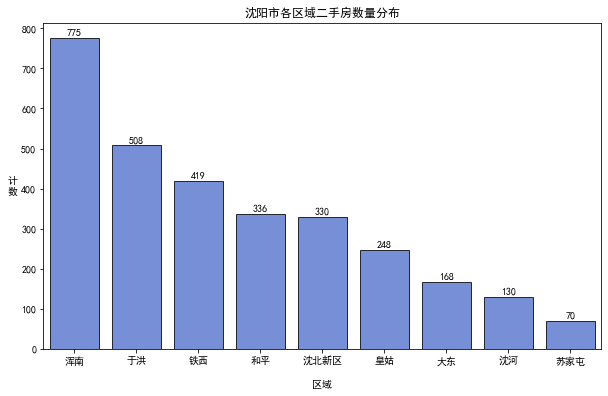

In [241]:
plt.figure(figsize=(10,6))
plt.title("沈阳市各区域二手房数量分布")
g = sns.barplot(areaName, areaCountList, alpha=0.8, color="royalblue",edgecolor="k")
plt.xlabel("\n区域")
plt.ylabel("计\n数", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
for a,b in zip(range(len(areaName)),areaCountList):   #柱子上的数字显示
    plt.text(a,b+3,'%.f' % b,ha='center',va='bottom',fontsize=10)
plt.show()

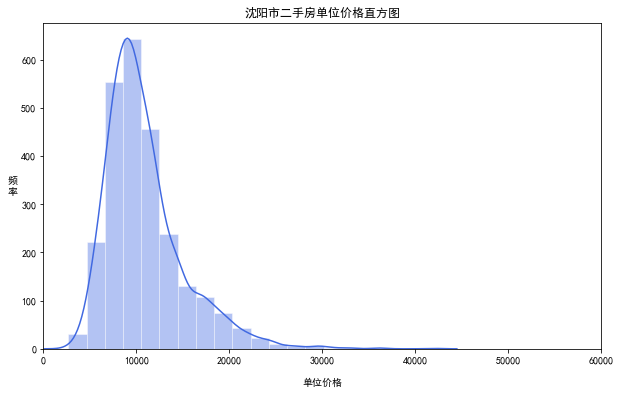

In [242]:
plt.figure(figsize=(10,6))
plt.title("沈阳市二手房单位价格直方图")
sns.distplot(data['单位价格'], color="royalblue",bins=20, kde=True, hist_kws={"edgecolor":"w"})
plt.xlabel("\n单位价格")
plt.ylabel("频\n率", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
yticks_list = ['0', '100', '200', '300', '400', '500', '600']
plt.yticks(np.arange(0.0, 0.00014, 0.00002), yticks_list)
plt.xlim(0,60000)
plt.show()

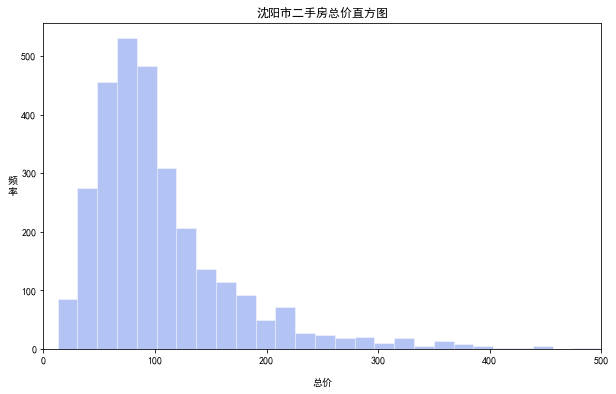

In [243]:
plt.figure(figsize=(10,6))
plt.title("沈阳市二手房总价直方图")
sns.distplot(data['总价'], color="royalblue",bins=50, kde=False, hist_kws={"edgecolor":"w"})
plt.xlabel("\n总价")
plt.ylabel("频\n率", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
# yticks_list = ['0', '100', '200', '300', '400', '500', '600']
# plt.yticks(np.arange(0.0, 0.00014, 0.00002), yticks_list)
plt.xlim(0,500)
plt.show()

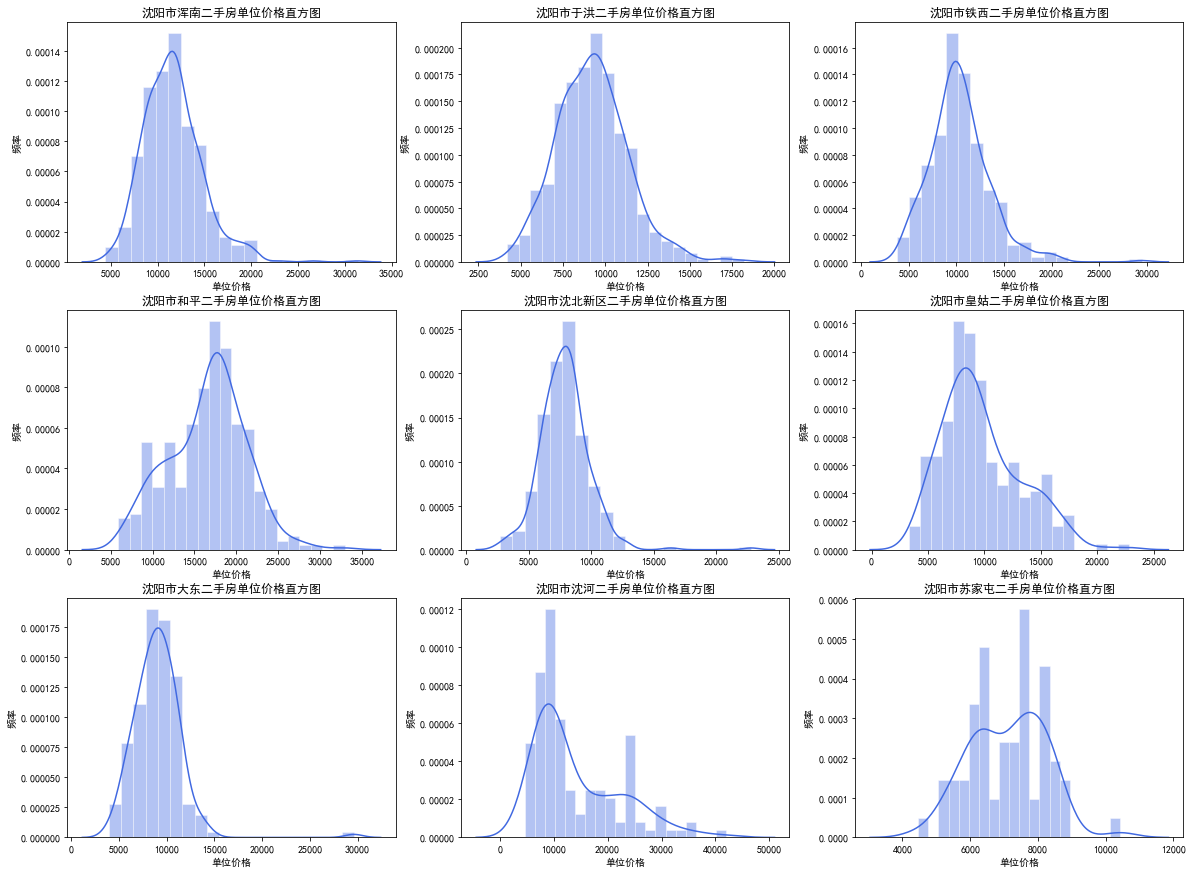

In [244]:
plt.figure(figsize=(20,15))
for i in range(len(areaName)):
    cur_data = data[ data['所属区县'] == areaName[i] ]
    plt.subplot(3,3,i+1)
    plt.title("沈阳市" + areaName[i] + "二手房单位价格直方图")
    sns.distplot(cur_data['单位价格'], color="royalblue",bins=20, kde=True, hist_kws={"edgecolor":"w"})
    plt.xlabel("单位价格")
    plt.ylabel("频率")
plt.show()

In [246]:
huxingName = list(data['房屋户型'].value_counts().index)
huxingCountList = list(data['房屋户型'].value_counts())

In [247]:
otherCount = sum(huxingCountList[12:])

huxingName = huxingName[:12]
huxingCountList = huxingCountList[:12]

huxingName.append("其他户型")
huxingCountList.append(otherCount)

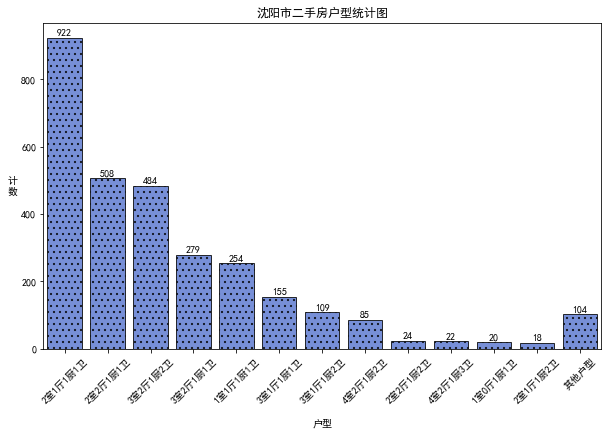

In [248]:
plt.figure(figsize=(10,6))
plt.title("沈阳市二手房户型统计图")
g = sns.barplot(huxingName, huxingCountList, alpha=0.8, color="royalblue",edgecolor="k",hatch="..")
plt.xlabel("\n户型")
plt.ylabel("计\n数", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
for a,b in zip(range(len(huxingName)),huxingCountList):   #柱子上的数字显示
    plt.text(a,b+3,'%.f' % b,ha='center',va='bottom',fontsize=10);
plt.xticks(rotation = 45)
plt.show()

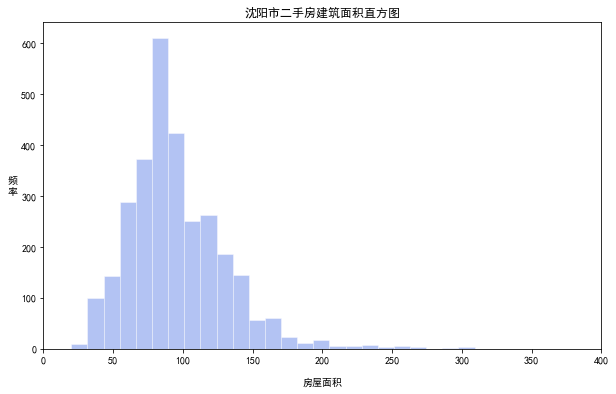

In [249]:
plt.figure(figsize=(10,6))
plt.title("沈阳市二手房建筑面积直方图")
sns.distplot(data['建筑面积'], color="royalblue",bins=25, kde=False, hist_kws={"edgecolor":"w"})
plt.xlabel("\n房屋面积")
plt.ylabel("频\n率", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
plt.xlim(0,400)
plt.show()

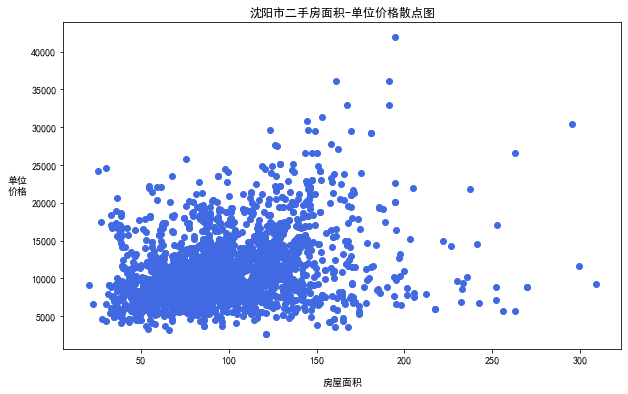

In [250]:
plt.figure(figsize=(10,6))
plt.title("沈阳市二手房面积-单位价格散点图")
plt.scatter(data['建筑面积'], data['单位价格'],color="royalblue")
plt.xlabel("\n房屋面积")
plt.ylabel("单位\n价格", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
plt.show()

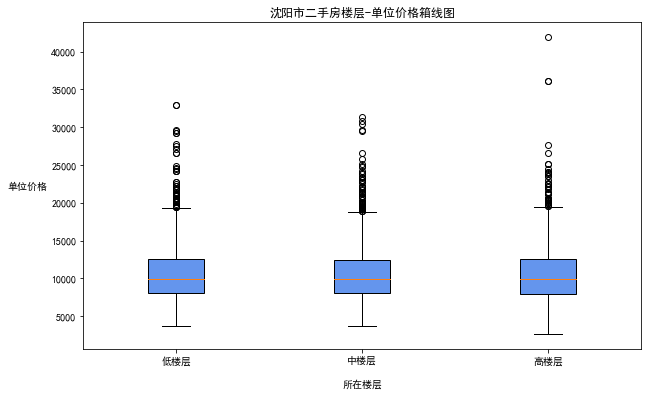

In [252]:
louceng = [list(data[ data['所在楼层'] == "低楼层" ]["单位价格"]), 
           list(data[ data['所在楼层'] == "中楼层" ]["单位价格"]), 
           list(data[ data['所在楼层'] == "高楼层" ]["单位价格"])]

plt.figure(figsize=(10,6))
plt.title("沈阳市二手房楼层-单位价格箱线图")
dd = plt.boxplot(louceng, labels = ['低楼层','中楼层','高楼层'],patch_artist=True,boxprops={'facecolor':'cornflowerblue'})
plt.xlabel("\n所在楼层")
plt.ylabel("单位价格", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
plt.show()

In [254]:
data.columns

Index(['总价', '单位价格', '楼房信息', '小区', '所属区县', '房屋户型', '所在楼层', '建筑面积', '户型结构', '套内面积', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '供暖方式', '配备电梯', '挂牌时间', '交易权属', '上次交易', '房屋用途', '房屋年限', '产权所属', '抵押信息', '房本备件', '户型分间', '小区简介', '房屋户型_室', '房屋户型_厅', '房屋户型_厨', '房屋户型_卫', '梯户比例_梯', '梯户比例_户', '梯户比例_比例'], dtype='object')

In [255]:
data['装修情况'].value_counts()

精装    1871
毛坯     481
简装     458
其他     174
Name: 装修情况, dtype: int64

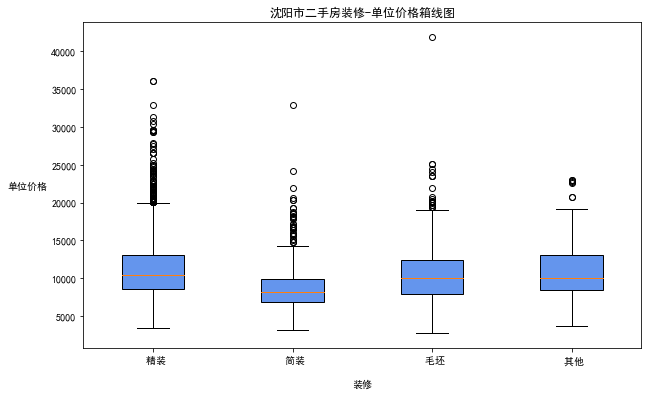

In [256]:
zhuangxiu = [list(data[ data['装修情况'] == "精装" ]["单位价格"]), 
           list(data[ data['装修情况'] == "简装" ]["单位价格"]), 
           list(data[ data['装修情况'] == "毛坯" ]["单位价格"]), 
           list(data[ data['装修情况'] == "其他" ]["单位价格"])]

plt.figure(figsize=(10,6))
plt.title("沈阳市二手房装修-单位价格箱线图")
dd = plt.boxplot(zhuangxiu, labels = [' 精装', ' 简装', ' 毛坯',' 其他'],patch_artist=True,boxprops={'facecolor':'cornflowerblue'})
plt.xlabel("\n装修")
plt.ylabel("单位价格", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
plt.show()

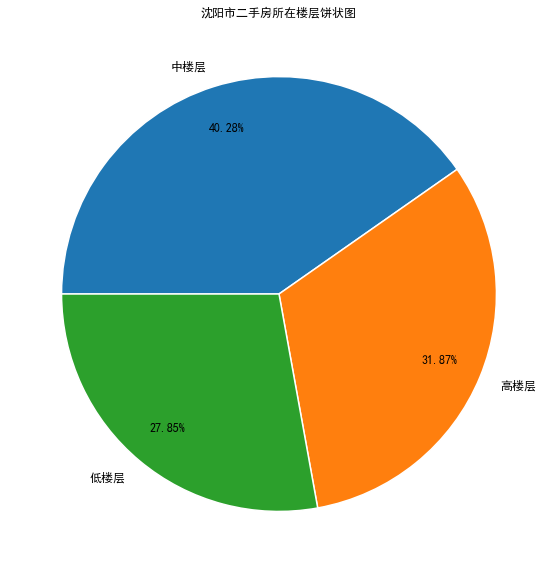

In [261]:
plt.figure(figsize=(12,10))
plt.title("沈阳市二手房所在楼层饼状图")
louceng2 = data['所在楼层'].value_counts()
plt.pie(louceng2, labels = louceng2.index, autopct='%.2f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.1, # 设置教育水平标签与圆心的距离
        startangle = 180, # 设置饼图的初始角度
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'w'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'black'}, # 设置文本标签的属性值
       )
plt.show()

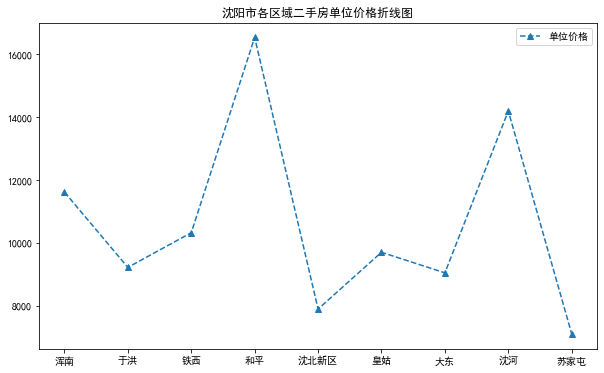

In [262]:
meanValue = []
sumValue = []

for i in range(len(areaName)):
    cur_data = data[ data['所属区县'] == areaName[i] ]
    meanValue.append(round(cur_data['单位价格'].mean(),2))
    sumValue.append(round(cur_data['总价'].mean(),2))   

    
plt.figure(figsize=(10,6))
plt.title("沈阳市各区域二手房单位价格折线图")
plt.plot(range(len(areaName)), meanValue, '--^', label="单位价格")
# 总价折线图
# plt.plot(range(len(areaName)), sumValue)
plt.xticks(range(len(areaName)), labels = areaName)
plt.legend()
plt.show()

In [263]:
corrColName = list(data.dtypes[ data.dtypes != 'object' ].index)
corrDf = data[corrColName]
data_corr = corrDf.corr()
price_corr = dict(data_corr.iloc[0])
price_corr = sorted(price_corr.items(), key=lambda x: abs(x[1]), reverse=True)
price_corr

[('总价', 1.0),
 ('单位价格', 0.8222981290702119),
 ('建筑面积', 0.7251709920087407),
 ('套内面积', 0.7204559353359031),
 ('房屋户型_卫', 0.6312862646749),
 ('房屋户型_室', 0.5902144343661491),
 ('房屋户型_厅', 0.39760899920810316),
 ('梯户比例_比例', -0.3133978158118177),
 ('梯户比例_户', -0.27384128491689264),
 ('楼房信息', 0.2288081405819666),
 ('梯户比例_梯', -0.06639533403491238),
 ('房屋户型_厨', 0.04939490040354267)]

In [264]:
print(price_corr)

[('总价', 1.0), ('单位价格', 0.8222981290702119), ('建筑面积', 0.7251709920087407), ('套内面积', 0.7204559353359031), ('房屋户型_卫', 0.6312862646749), ('房屋户型_室', 0.5902144343661491), ('房屋户型_厅', 0.39760899920810316), ('梯户比例_比例', -0.3133978158118177), ('梯户比例_户', -0.27384128491689264), ('楼房信息', 0.2288081405819666), ('梯户比例_梯', -0.06639533403491238), ('房屋户型_厨', 0.04939490040354267)]


In [265]:
price_corr_cols = [ r[0] for r in price_corr ]
price_data = data_corr[price_corr_cols].loc[price_corr_cols]

In [266]:
price_data.shape

(12, 12)

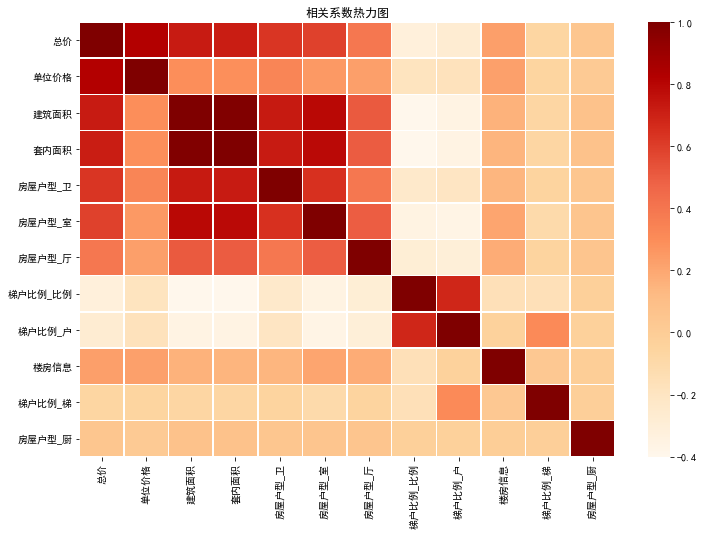

In [267]:
plt.figure(figsize=(12, 8))
plt.title("相关系数热力图")
ax = sns.heatmap(price_data, linewidths=0.5, cmap='OrRd', cbar=True)
plt.show()

In [268]:
data.head()

,总价,单位价格,楼房信息,小区,所属区县,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,户型分间,小区简介,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例
0,179.0,14512.0,2014,富海澜湾半岛,和平,3室2厅1厨2卫,高楼层,123.35,平层,108.03,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,已上传房本照片,"{'客厅面积': '38.13平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '11.34平米', '卧室A朝向': '无', '卧室A窗型': '未知窗户类型', '卧室B面积': '15.78平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '10.89平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '5.3平米', '厨房朝向': '无', '厨房窗型': '未知窗户类型', '卫生间A面积': '4.1平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '3.43平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2013年', '楼栋总数': '27栋', '小区均价': 17465}",3,2,1,2,2,2,1.0
1,105.0,9740.0,2011,东星花庭,大东,3室2厅1厨1卫,中楼层,107.81,平层,92.49,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '31.31平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '8.91平米', '卧室A朝向': '北', '卧室A窗型': '普通窗', '卧室B面积': '9.76平米', '卧室B朝向': '北', '卧室B窗型': '普通窗', '卧室C面积': '12.57平米', '卧室C朝向': '南', '卧室C窗型': '普通窗', '厨房面积': '7.97平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '3.91平米', '卫生间朝向': '北', '卫生间窗型': '普通窗', '洗手间面积': '1.95平米', '洗手间朝向': '无', '洗手间窗型': '无窗'}","{'小区建造年份': '1999年', '楼栋总数': '5栋', '小区均价': 9590}",3,2,1,1,2,4,2.0
2,67.8,8693.0,2000,北舍宅,皇姑,2室1厅1厨1卫,高楼层,78.00,平层,62.68,板塔结合,东 西,混合结构,简装,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,已上传房本照片,"{'客厅面积': '17.54平米', '客厅朝向': '无', '客厅窗型': '无窗', '卧室A面积': '14.85平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '13.43平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '厨房面积': '7.69平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '5.35平米', '卫生间朝向': '无', '卫生间窗型': '无窗', '阳台面积': '4.47平米', '阳台朝向': '西 北 东', '阳台窗型': '普通窗'}","{'小区建造年份': '1990年', '楼栋总数': '13栋', '小区均价': 14413}",2,1,1,1,1,2,2.0
3,179.0,13426.0,2010,首创国际城,浑南,3室2厅1厨2卫,低楼层,133.33,平层,118.01,板楼,南 北,钢混结构,精装,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '27.16平米', '客厅朝向': '西 南', '客厅窗型': '落地窗', '卧室A面积': '11.8平米', '卧室A朝向': '南', '卧室A窗型': '落地窗', '卧室B面积': '15.48平米', '卧室B朝向': '无', '卧室B窗型': '未知窗户类型', '卧室C面积': '9.36平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '15.38平米', '厨房朝向': '北', '厨房窗型': '落地窗', '卫生间A面积': '4.87平米', '卫生间A朝向': '北', '卫生间A窗型': '普通窗', '卫生间B面积': '5.22平米', '卫生间B朝向': '北', '卫生间B窗型': '落地窗', '阳台面积': '7.92平米', '阳台朝向': '西 北 东', '阳台窗型': '落地窗', '过道A面积': '5.45平米', '过道A朝向': '无', '过道A窗型': '无窗', '过道B面积': '4.06平米', '过道B朝向': '无', '过道B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '27栋', '小区均价': 11637}",3,2,1,2,2,3,1.5
4,90.0,7987.0,2009,雅居乐花园C地块,沈北新区,3室2厅1厨2卫,高楼层,112.69,平层,97.37,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,已上传房本照片,"{'客厅面积': '42.56平米', '客厅朝向': '东 南', '客厅窗型': '落地窗', '卧室A面积': '16.82平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '15.71平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '7.5平米', '卧室C朝向': '北', '卧室C窗型': '普通窗', '厨房面积': '5.3平米', '厨房朝向': '西', '厨房窗型': '普通窗', '卫生间A面积': '4.2平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '4.04平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '38栋', '小区均价': 9263}",3,2,1,2,1,2,2.0


In [269]:
def xiaoquInfo(df, flag):
    xiaoqu = json.loads(df['小区简介'].replace("'", '"'))
    if flag == 1:
        return int(xiaoqu['小区建造年份'][:-1])
    elif flag == 2:
        return int(xiaoqu['楼栋总数'][:-1])
    else:
        return xiaoqu['小区均价']

In [270]:
data['小区建造年份'] = data.apply(lambda x:xiaoquInfo(x, 1), axis=1)
data['楼栋总数'] = data.apply(lambda x:xiaoquInfo(x, 2), axis=1)
data['小区均价'] = data.apply(lambda x:xiaoquInfo(x, 3), axis=1)

In [271]:
data.head()

,总价,单位价格,楼房信息,小区,所属区县,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,户型分间,小区简介,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例,小区建造年份,楼栋总数,小区均价
0,179.0,14512.0,2014,富海澜湾半岛,和平,3室2厅1厨2卫,高楼层,123.35,平层,108.03,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,已上传房本照片,"{'客厅面积': '38.13平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '11.34平米', '卧室A朝向': '无', '卧室A窗型': '未知窗户类型', '卧室B面积': '15.78平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '10.89平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '5.3平米', '厨房朝向': '无', '厨房窗型': '未知窗户类型', '卫生间A面积': '4.1平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '3.43平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2013年', '楼栋总数': '27栋', '小区均价': 17465}",3,2,1,2,2,2,1.0,2013,27,17465
1,105.0,9740.0,2011,东星花庭,大东,3室2厅1厨1卫,中楼层,107.81,平层,92.49,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '31.31平米', '客厅朝向': '无', '客厅窗型': '未知窗户类型', '卧室A面积': '8.91平米', '卧室A朝向': '北', '卧室A窗型': '普通窗', '卧室B面积': '9.76平米', '卧室B朝向': '北', '卧室B窗型': '普通窗', '卧室C面积': '12.57平米', '卧室C朝向': '南', '卧室C窗型': '普通窗', '厨房面积': '7.97平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '3.91平米', '卫生间朝向': '北', '卫生间窗型': '普通窗', '洗手间面积': '1.95平米', '洗手间朝向': '无', '洗手间窗型': '无窗'}","{'小区建造年份': '1999年', '楼栋总数': '5栋', '小区均价': 9590}",3,2,1,1,2,4,2.0,1999,5,9590
2,67.8,8693.0,2000,北舍宅,皇姑,2室1厅1厨1卫,高楼层,78.00,平层,62.68,板塔结合,东 西,混合结构,简装,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,已上传房本照片,"{'客厅面积': '17.54平米', '客厅朝向': '无', '客厅窗型': '无窗', '卧室A面积': '14.85平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '13.43平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '厨房面积': '7.69平米', '厨房朝向': '北', '厨房窗型': '普通窗', '卫生间面积': '5.35平米', '卫生间朝向': '无', '卫生间窗型': '无窗', '阳台面积': '4.47平米', '阳台朝向': '西 北 东', '阳台窗型': '普通窗'}","{'小区建造年份': '1990年', '楼栋总数': '13栋', '小区均价': 14413}",2,1,1,1,1,2,2.0,1990,13,14413
3,179.0,13426.0,2010,首创国际城,浑南,3室2厅1厨2卫,低楼层,133.33,平层,118.01,板楼,南 北,钢混结构,精装,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,已上传房本照片,"{'客厅面积': '27.16平米', '客厅朝向': '西 南', '客厅窗型': '落地窗', '卧室A面积': '11.8平米', '卧室A朝向': '南', '卧室A窗型': '落地窗', '卧室B面积': '15.48平米', '卧室B朝向': '无', '卧室B窗型': '未知窗户类型', '卧室C面积': '9.36平米', '卧室C朝向': '无', '卧室C窗型': '未知窗户类型', '厨房面积': '15.38平米', '厨房朝向': '北', '厨房窗型': '落地窗', '卫生间A面积': '4.87平米', '卫生间A朝向': '北', '卫生间A窗型': '普通窗', '卫生间B面积': '5.22平米', '卫生间B朝向': '北', '卫生间B窗型': '落地窗', '阳台面积': '7.92平米', '阳台朝向': '西 北 东', '阳台窗型': '落地窗', '过道A面积': '5.45平米', '过道A朝向': '无', '过道A窗型': '无窗', '过道B面积': '4.06平米', '过道B朝向': '无', '过道B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '27栋', '小区均价': 11637}",3,2,1,2,2,3,1.5,2009,27,11637
4,90.0,7987.0,2009,雅居乐花园C地块,沈北新区,3室2厅1厨2卫,高楼层,112.69,平层,97.37,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,已上传房本照片,"{'客厅面积': '42.56平米', '客厅朝向': '东 南', '客厅窗型': '落地窗', '卧室A面积': '16.82平米', '卧室A朝向': '南', '卧室A窗型': '普通窗', '卧室B面积': '15.71平米', '卧室B朝向': '南', '卧室B窗型': '普通窗', '卧室C面积': '7.5平米', '卧室C朝向': '北', '卧室C窗型': '普通窗', '厨房面积': '5.3平米', '厨房朝向': '西', '厨房窗型': '普通窗', '卫生间A面积': '4.2平米', '卫生间A朝向': '无', '卫生间A窗型': '无窗', '卫生间B面积': '4.04平米', '卫生间B朝向': '无', '卫生间B窗型': '无窗'}","{'小区建造年份': '2009年', '楼栋总数': '38栋', '小区均价': 9263}",3,2,1,2,1,2,2.0,2009,38,9263


In [272]:
data.columns

Index(['总价', '单位价格', '楼房信息', '小区', '所属区县', '房屋户型', '所在楼层', '建筑面积', '户型结构', '套内面积', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '供暖方式', '配备电梯', '挂牌时间', '交易权属', '上次交易', '房屋用途', '房屋年限', '产权所属', '抵押信息', '房本备件', '户型分间', '小区简介', '房屋户型_室', '房屋户型_厅', '房屋户型_厨', '房屋户型_卫', '梯户比例_梯', '梯户比例_户', '梯户比例_比例', '小区建造年份', '楼栋总数', '小区均价'], dtype='object')

In [273]:
data = data[['总价', '单位价格', '楼房信息', '所属区县', '所在楼层', '建筑面积', '户型结构', '套内面积', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '供暖方式', '配备电梯', '挂牌时间', '交易权属', '上次交易', '房屋用途', '房屋年限', '产权所属', '抵押信息', '房屋户型_室', '房屋户型_厅', '房屋户型_厨', '房屋户型_卫', '梯户比例_梯', '梯户比例_户', '梯户比例_比例', '小区建造年份', '楼栋总数', '小区均价']]

In [274]:
data.head()

,总价,单位价格,楼房信息,所属区县,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例,小区建造年份,楼栋总数,小区均价
0,179.0,14512.0,2014,和平,高楼层,123.35,平层,108.03,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,3,2,1,2,2,2,1.0,2013,27,17465
1,105.0,9740.0,2011,大东,中楼层,107.81,平层,92.49,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,3,2,1,1,2,4,2.0,1999,5,9590
2,67.8,8693.0,2000,皇姑,高楼层,78.00,平层,62.68,板塔结合,东 西,混合结构,简装,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,2,1,1,1,1,2,2.0,1990,13,14413
3,179.0,13426.0,2010,浑南,低楼层,133.33,平层,118.01,板楼,南 北,钢混结构,精装,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,3,2,1,2,2,3,1.5,2009,27,11637
4,90.0,7987.0,2009,沈北新区,高楼层,112.69,平层,97.37,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,3,2,1,2,1,2,2.0,2009,38,9263


In [275]:
data['所属区县'].value_counts()

浑南      775
于洪      508
铁西      419
和平      336
沈北新区    330
皇姑      248
大东      168
沈河      130
苏家屯      70
Name: 所属区县, dtype: int64

In [276]:
from sklearn.cluster import KMeans

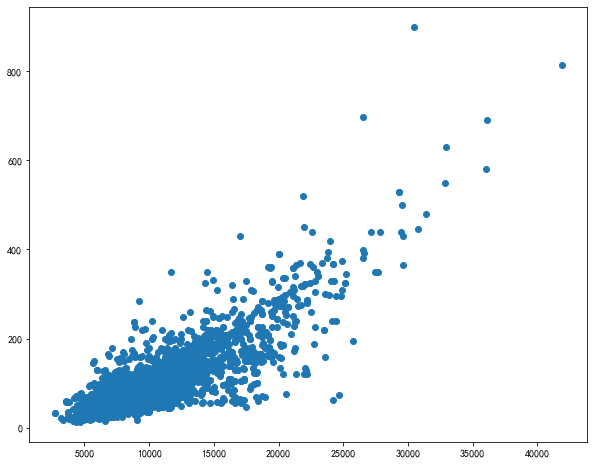

In [277]:
plt.figure(figsize=(10,8))
plt.scatter(data['单位价格'], data['总价'])

In [278]:
data['所属区县'].value_counts()

浑南      775
于洪      508
铁西      419
和平      336
沈北新区    330
皇姑      248
大东      168
沈河      130
苏家屯      70
Name: 所属区县, dtype: int64

In [279]:
estimator = KMeans(n_clusters=9) # 构造聚类器
estimator.fit(data[ ['单位价格', '总价'] ])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [280]:
label_pred = estimator.labels_ # 获取聚类标签
centers_ = estimator.cluster_centers_ # 获取聚类中心

In [281]:
label_pred,centers_

(array([1, 2, 5, ..., 2, 0, 6]), array([[ 5753.00887574,    49.42721893],
        [14202.57741935,   153.44032258],
        [ 9663.09769335,    86.00230665],
        [24369.6       ,   322.49555556],
        [20356.4245283 ,   251.28301887],
        [ 7842.16493314,    70.84665676],
        [11708.34805654,   110.31166078],
        [17279.04102564,   175.97076923],
        [32098.92857143,   563.14285714]]))

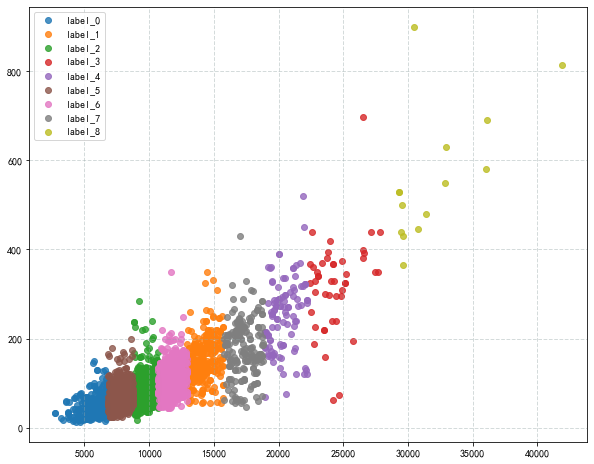

In [282]:
plt.figure(figsize=(10,8))
for i in range(9):
    x0 = data[label_pred == i]
    plt.scatter(x0["单位价格"], x0["总价"],linewidths=1, alpha=0.8, label='label_'+str(i))
    plt.grid(c="#95a5a6", linestyle="--", linewidth=1, alpha=0.4)
plt.legend()
plt.show()

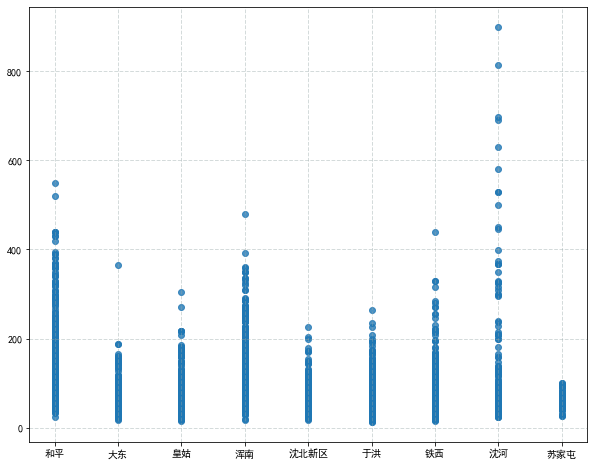

In [283]:
plt.figure(figsize=(10,8))

plt.scatter(data["所属区县"], data["总价"],linewidths=1, alpha=0.8)
plt.grid(c="#95a5a6", linestyle="--", linewidth=1, alpha=0.4)
plt.show()

In [284]:
def convertArea(df):
    qxDict = {"苏家屯": 0, "和平": 1, "大东": 2, "皇姑": 3, "浑南": 4, "沈北新区": 5, "于洪": 6, "铁西": 7, "沈河": 8}
    return qxDict[df['所属区县']]

In [285]:
data['所属区县_class'] = data.apply(lambda x:convertArea(x), axis=1)

In [286]:
data.head()

,总价,单位价格,楼房信息,所属区县,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例,小区建造年份,楼栋总数,小区均价,所属区县_class
0,179.0,14512.0,2014,和平,高楼层,123.35,平层,108.03,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,3,2,1,2,2,2,1.0,2013,27,17465,1
1,105.0,9740.0,2011,大东,中楼层,107.81,平层,92.49,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,3,2,1,1,2,4,2.0,1999,5,9590,2
2,67.8,8693.0,2000,皇姑,高楼层,78.00,平层,62.68,板塔结合,东 西,混合结构,简装,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,2,1,1,1,1,2,2.0,1990,13,14413,3
3,179.0,13426.0,2010,浑南,低楼层,133.33,平层,118.01,板楼,南 北,钢混结构,精装,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,3,2,1,2,2,3,1.5,2009,27,11637,4
4,90.0,7987.0,2009,沈北新区,高楼层,112.69,平层,97.37,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,3,2,1,2,1,2,2.0,2009,38,9263,5


In [288]:
data = data[['总价', '单位价格', '楼房信息', '所属区县', '所在楼层', '建筑面积', '户型结构', '套内面积', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '供暖方式', '配备电梯', '挂牌时间', '交易权属', '上次交易', '房屋用途', '房屋年限', '产权所属', '抵押信息', '房屋户型_室', '房屋户型_厅', '房屋户型_厨', '房屋户型_卫', '梯户比例_梯', '梯户比例_户', '梯户比例_比例', '小区建造年份', '楼栋总数', '小区均价']]

In [289]:
data.head()

,总价,单位价格,楼房信息,所属区县,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例,小区建造年份,楼栋总数,小区均价
0,179.0,14512.0,2014,和平,高楼层,123.35,平层,108.03,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,共有,有抵押90万元盛京银行业主自还,3,2,1,2,2,2,1.0,2013,27,17465
1,105.0,9740.0,2011,大东,中楼层,107.81,平层,92.49,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,非共有,无抵押,3,2,1,1,2,4,2.0,1999,5,9590
2,67.8,8693.0,2000,皇姑,高楼层,78.00,平层,62.68,板塔结合,东 西,混合结构,简装,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,非共有,无抵押,2,1,1,1,1,2,2.0,1990,13,14413
3,179.0,13426.0,2010,浑南,低楼层,133.33,平层,118.01,板楼,南 北,钢混结构,精装,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,非共有,无抵押,3,2,1,2,2,3,1.5,2009,27,11637
4,90.0,7987.0,2009,沈北新区,高楼层,112.69,平层,97.37,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,共有,无抵押,3,2,1,2,1,2,2.0,2009,38,9263


In [290]:
objCol = list(data.dtypes[ data.dtypes == 'object' ].index)

In [291]:
for c in objCol:
    print(data[c].value_counts())

浑南      775
于洪      508
铁西      419
和平      336
沈北新区    330
皇姑      248
大东      168
沈河      130
苏家屯      70
Name: 所属区县, dtype: int64
中楼层    1202
高楼层     951
低楼层     831
Name: 所在楼层, dtype: int64
平层      2742
跃层       112
复式        53
错层        53
暂无数据      24
Name: 户型结构, dtype: int64
板楼      2463
板塔结合     330
塔楼       107
暂无数据      80
平房         4
Name: 建筑类型, dtype: int64
南 北         2007
南            399
东南            80
西南            70
北 南           46
东 南 北         44
西北            44
西             42
东             31
南 西 北         29
东北            23
北             23
东 西           21
南 北 西         17
东 北           16
南 北 东         14
东 南            9
西 北            9
西南 北           9
南 西            9
西 南 北          7
东南 北           6
南 东 北          5
西 南            3
南 东            3
东 南 西          2
东 南 西北 北       2
东南 南           2
西 西北           2
南 北 东南         1
北 东南           1
东 北 西          1
东北 南           1
东 东南           1
东南 西南          1
南 东北           1
西南 南 北        

In [292]:
def diyaInfo(df):
    if df['抵押信息'] == '无抵押':
        return 0
    else:
        return 1

In [293]:
data['抵押信息_01'] = data.apply(lambda x:diyaInfo(x), axis=1)

In [294]:
data['产权所属'] = data['产权所属'].replace("非共有", 0).replace("共有", 1)

In [295]:
data['数据获取日期'] = '2022-04-24'

In [296]:
def calDate(df, c):
    if df[c] == '暂无数据':
        return np.nan
    d1=datetime.datetime.strptime('2022-04-24',"%Y-%m-%d")
    d2=datetime.datetime.strptime(df[c],"%Y-%m-%d")
    diff_days=d1-d2
#         print(diff_days)
    return diff_days.days

In [297]:
import datetime

In [298]:
for c in ['挂牌时间', '上次交易']:
    data[c+'差（天）'] = data.apply(lambda x:calDate(x, c), axis=1)

In [299]:
for c in ['挂牌时间差（天）', '上次交易差（天）']:
    data[c].fillna(data[c].mean(), inplace=True)

In [300]:
data['房龄'] = 2022 - data['楼房信息']

In [301]:
data.drop(['抵押信息'], axis=1, inplace=True)

In [302]:
data.head()

,总价,单位价格,楼房信息,所属区县,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,供暖方式,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例,小区建造年份,楼栋总数,小区均价,抵押信息_01,数据获取日期,挂牌时间差（天）,上次交易差（天）,房龄
0,179.0,14512.0,2014,和平,高楼层,123.35,平层,108.03,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-17,商品房,2019-06-03,普通住宅,满两年,1,3,2,1,2,2,2,1.0,2013,27,17465,1,2022-04-24,7,1056.0,8
1,105.0,9740.0,2011,大东,中楼层,107.81,平层,92.49,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-22,商品房,2015-10-14,普通住宅,满五年,0,3,2,1,1,2,4,2.0,1999,5,9590,0,2022-04-24,2,2384.0,11
2,67.8,8693.0,2000,皇姑,高楼层,78.00,平层,62.68,板塔结合,东 西,混合结构,简装,集中供暖,无,2022-04-19,商品房,2018-08-02,普通住宅,满两年,0,2,1,1,1,1,2,2.0,1990,13,14413,0,2022-04-24,5,1361.0,22
3,179.0,13426.0,2010,浑南,低楼层,133.33,平层,118.01,板楼,南 北,钢混结构,精装,集中供暖,有,2021-12-11,商品房,2016-08-17,普通住宅,满五年,0,3,2,1,2,2,3,1.5,2009,27,11637,0,2022-04-24,134,2076.0,12
4,90.0,7987.0,2009,沈北新区,高楼层,112.69,平层,97.37,板楼,南 北,钢混结构,精装,集中供暖,有,2022-04-15,商品房,2016-05-06,普通住宅,满五年,1,3,2,1,2,1,2,2.0,2009,38,9263,0,2022-04-24,9,2179.0,13


In [303]:
list(data.dtypes[ data.dtypes == 'object' ].index)

['所属区县',
 '所在楼层',
 '户型结构',
 '建筑类型',
 '房屋朝向',
 '建筑结构',
 '装修情况',
 '供暖方式',
 '配备电梯',
 '挂牌时间',
 '交易权属',
 '上次交易',
 '房屋用途',
 '房屋年限',
 '数据获取日期']

In [304]:
def calChaoxiang(df):
    chaoxiangCol = ['南 北', '南', '东南', '西南', '北 南', '东 南 北', '西北', '西', '东', '南 西 北', '东北', '北', '东 西', '南 北 西', '东 北', '南 北 东']
    if df['房屋朝向'] not in chaoxiangCol:
        return "其他朝向"
    else:
        return df['房屋朝向']

In [305]:
data['房屋朝向'] = data.apply(lambda x:calChaoxiang(x), axis=1)

In [307]:
one_hot_col_names = ['所属区县',
 '所在楼层',
 '户型结构',
 '建筑类型',
 '房屋朝向',
 '建筑结构',
 '装修情况',
 '供暖方式',
 '配备电梯',
 '交易权属',
 '房屋用途',
 '房屋年限']

In [308]:
data.drop(['挂牌时间', '上次交易', '数据获取日期'], axis=1, inplace=True)

In [309]:
one_hot_data = pd.get_dummies(data[one_hot_col_names])

In [310]:
data.shape, len(one_hot_col_names)

((2984, 32), 12)

In [311]:
data = pd.concat([data,one_hot_data],axis = 1)
data.drop(one_hot_col_names, axis=1, inplace=True)

In [312]:
data.shape, one_hot_data.shape

((2984, 85), (2984, 65))

In [313]:
data.head()

,总价,单位价格,楼房信息,建筑面积,套内面积,产权所属,房屋户型_室,房屋户型_厅,房屋户型_厨,房屋户型_卫,梯户比例_梯,梯户比例_户,梯户比例_比例,小区建造年份,楼栋总数,小区均价,抵押信息_01,挂牌时间差（天）,上次交易差（天）,房龄,所属区县_于洪,所属区县_和平,所属区县_大东,所属区县_沈北新区,所属区县_沈河,所属区县_浑南,所属区县_皇姑,所属区县_苏家屯,所属区县_铁西,所在楼层_中楼层,所在楼层_低楼层,所在楼层_高楼层,户型结构_复式,户型结构_平层,户型结构_暂无数据,户型结构_跃层,户型结构_错层,建筑类型_塔楼,建筑类型_平房,建筑类型_暂无数据,建筑类型_板塔结合,建筑类型_板楼,房屋朝向_东,房屋朝向_东 北,房屋朝向_东 南 北,房屋朝向_东 西,房屋朝向_东北,房屋朝向_东南,房屋朝向_其他朝向,房屋朝向_北,房屋朝向_北 南,房屋朝向_南,房屋朝向_南 北,房屋朝向_南 北 东,房屋朝向_南 北 西,房屋朝向_南 西 北,房屋朝向_西,房屋朝向_西北,房屋朝向_西南,建筑结构_未知结构,建筑结构_框架结构,建筑结构_混合结构,建筑结构_砖混结构,建筑结构_钢混结构,装修情况_其他,装修情况_毛坯,装修情况_简装,装修情况_精装,供暖方式_暂无数据,供暖方式_自供暖,供暖方式_集中供暖,配备电梯_无,配备电梯_暂无数据,配备电梯_有,交易权属_商品房,交易权属_已购公房,交易权属_经济适用房,交易权属_限价商品房,房屋用途_别墅,房屋用途_商住两用,房屋用途_普通住宅,房屋年限_暂无数据,房屋年限_未满两年,房屋年限_满两年,房屋年限_满五年
0,179.0,14512.0,2014,123.35,108.03,1,3,2,1,2,2,2,1.0,2013,27,17465,1,7,1056.0,8,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
1,105.0,9740.0,2011,107.81,92.49,0,3,2,1,1,2,4,2.0,1999,5,9590,0,2,2384.0,11,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
2,67.8,8693.0,2000,78.00,62.68,0,2,1,1,1,1,2,2.0,1990,13,14413,0,5,1361.0,22,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0
3,179.0,13426.0,2010,133.33,118.01,0,3,2,1,2,2,3,1.5,2009,27,11637,0,134,2076.0,12,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,90.0,7987.0,2009,112.69,97.37,1,3,2,1,2,1,2,2.0,2009,38,9263,0,9,2179.0,13,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1


In [314]:
data.to_excel("二手房数据（处理后）.xlsx", index=False)